In [1]:
pip install scikit-learn imbalanced-learn pandas matplotlib plotnine joblib seaborn category-encoders xgboost lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt
import warnings, os, json
from IPython.display import display
from pathlib import Path

In [3]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.width",None)


In [4]:
# PLOT THEME
theme_set(
        theme_minimal()
          + theme(
            figure_size=(18, 8),
            text=element_text(size=11),
            plot_title=element_text(size=16, fontweight="bold"),
            plot_subtitle=element_text(size=12, fontstyle="italic"),
            axis_title= element_text(size=12),
            axis_text=element_text(size=10),
             legend_text=element_text(size=10),
                     legend_position="bottom",
                     )
            )

In [5]:
assault_df_night=pd.read_csv("newnight_df.csv")


In [6]:
assault_df_night

,Reporting Event Number,Age,Sex,Race,Ethnicity,Offense Start Date,Offense Code Name,NIBRS Code,Case Status,Division,Offense Address,Latitude,Longitude,COUNDIST,Hour,Is_Nighttime,Year,Age Group,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,ObjectId,month
0,LMPD23046471,12,Female,White,Hispanic Or Latino,2023-01-01 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active,8,"4808 MIDDLESEX DR\nWORTHINGTON HILLS, KY 40245",38.308736,-85.522934,17,0,True,2023,0–17,LMPD23046471,6/1/2023 5:22:00 PM,1/1/2023 5:00:00 AM,7015.0,4 FORCIBLE RAPE,RAPE - 1ST DEGREE 510.040 10990 11A,11A,A,YES,8TH DIVISION,811,RESIDENCE/HOME,4800 BLOCK MIDDLESEX DR,WORTHINGTON HILLS,40245,42204,1
1,LMPD23088980,15,Female,White,Not Hispanic Or Latino,2023-01-01 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,8,"3106 KINVARA LN\nGOOSE CREEK, KY 40242",38.291753,-85.592448,17,0,True,2023,0–17,LMPD23088980,1/1/2023 7:41:00 PM,1/1/2023 5:00:00 AM,7371.0,4 FORCIBLE RAPE,RAPE - 1ST DEGREE 510.040 10990 11A,11A,A,YES,8TH DIVISION,812,RESIDENCE/HOME,3100 BLOCK KINVARA LN,GOOSE CREEK,40242,70807,1
2,8023001005,11,Female,White,Not Hispanic Or Latino,2023-01-02 18:00:00,RAPE - 1ST DEGREE - VICTIM U/12 YEARS OF AGE 5...,11A,Open/Active (MIG),6,"2830 POMEROY DR\nLOUISVILLE, KY 40218\nUNITED ...",38.199039,-85.635948,10,18,True,2023,0–17,8023001005,1/2/2023 11:00:00 PM,1/2/2023 11:00:00 PM,7947.0,4 FORCIBLE RAPE,RAPE - 1ST DEGREE - VICTIM U/12 YEARS OF AGE 5...,11A,A,YES,6TH DIVISION,625,RESIDENCE/HOME,2800 BLOCK POMEROY DR,LOUISVILLE,40218,71111,1
3,8023001274,17,Female,White,Not Hispanic Or Latino,2023-01-02 20:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active (MIG),1,"1698 MAGAZINE ST\nLOUISVILLE, KY 40203\nUNITED...",38.250003,-85.779622,4,20,True,2023,0–17,8023001274,1/3/2023 1:00:00 AM,1/3/2023 1:00:00 AM,7015.0,4 FORCIBLE RAPE,RAPE - 1ST DEGREE 510.040 10990 11A,11A,A,YES,1ST DIVISION,112,PARK/ PLAYGROUND,1600 BLOCK MAGAZINE ST,LOUISVILLE,40203,70934,1
4,8023001635,19,Female,White,Not Hispanic Or Latino,2023-01-04 01:08:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active (MIG),4,"SIXMILE ISLAND\nLOUISVILLE, KY 99999\nUNITED S...",38.239471,-85.761667,6,1,True,2023,18–30,8023001635,1/8/2023 5:11:00 AM,1/4/2023 6:08:00 AM,2623.0,4 FORCIBLE RAPE,RAPE - 1ST DEGREE 510.040 10990 11A,11A,A,YES,8TH DIVISION,812,OTHER/UNKNOWN,SIXMILE ISLAND,LOUISVILLE,99999,69769,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,LMPD23123249,16,Female,White,Hispanic Or Latino,2023-12-14 03:50:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active,6,"1367 GARDINER LN\nWATTERSON PARK, KY 40213",38.197717,-85.700115,10,3,True,2023,0–17,LMPD23123249,12/14/2023 8:50:00 AM,12/14/2023 8:50:00 AM,2623.0,4 FORCIBLE RAPE,RAPE - 1ST DEGREE 510.040 10990 11A,11A,A,YES,6TH DIVISION,613,HOTEL/ MOTEL/ ETC.,1300 BLOCK GARDINER LN,WATTERSON PARK,40213,3881,12
175,LMPD23129385,18,Female,White,Hispanic Or Latino,2023-12-15 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,7,"SIXMILE ISLAND\nLOUISVILLE, KY 99999\nUNITED S...",38.170449,-85.603572,26,0,True,2023,18–30,LMPD23129385,12/31/2023 4:45:00 AM,12/15/2023 5:00:00 AM,7015.0,4 FORCIBLE RAPE,RAPE - 1ST DEGREE 510.040 10990 11A,11A,A,YES,7TH DIVISION,711,OTHER/UNKNOWN,5000 BLOCK S HURSTBOURNE PKY,LOUISVILLE,40291,695,12
176,LMPD23124681,31,Female,White,Not Hispanic Or Latino,2023-12-15 22:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,SVU Only - Victim Requests Closure,2,"4713 BEECH DR\nLOUISVILLE, KY 40216",38.202771,-85.844656,1,22,True,2023,31–45,LMPD23124681,12/16/2023 3:00:00 AM,12/16/2023 3:00:00 AM,2623.0,4 FORCIBLE RAPE,RAPE - 1ST DEGREE 510.040 10990 11A,11A,A,YES,2ND DIVISION,236,RESIDENCE/HOME,4700 BLOCK BEECH DR,LOUISVILLE,40216,3388,12
177,LMPD23128103,27,Fema

In [7]:
assault_df_night.shape

(179, 35)

In [8]:
street_df=pd.read_csv("df_clean_311_2023DATA.csv")

In [9]:
street_df

,service_request_id,requested_datetime,probyear,updated_datetime,closed_date,status_description,source,service_name,description,agency_responsible,address,longitude,latitude,zip_code,council_district,ObjectId,x,y,response_time_months
0,SR-EXT-23-000603,2023-01-03 05:00:00,2023,10/3/2024 4:00:00 AM,2024-10-03 04:00:00,CLOSED,NaN,Exterior,Back door of house was kicked in and has now b...,NaN,1118 GOSS AVE,-85.734237,38.226281,40217.0,15,3,-9.543892e+06,4.611441e+06,20.990747
1,SR-MSDS-23-000608,2023-01-03 05:00:00,2023,1/3/2023 5:00:00 AM,NaN,OPEN,Call Center,Solid Waste Missed Services,CALLER REPORTS MISSED RECYCLE THE LAST 3 WEEKS...,NaN,1623 S 28TH ST,-85.801174,38.229072,40211.0,1,8,-9.551343e+06,4.611837e+06,NaN
2,SR-PRKG-23-000625,2023-01-03 05:00:00,2023,1/3/2023 5:00:00 AM,NaN,OPEN,Call Center,Parking Concern,Caller reports a Blue Chevy Cavalier with yell...,LMPD,813 S 39TH ST,-85.816246,38.247422,40211.0,5,25,-9.553021e+06,4.614437e+06,NaN
3,SR-WDEL-23-000630,2023-01-03 05:00:00,2023,1/3/2023 5:00:00 AM,2023-01-03 05:00:00,CLOSED,Call Center,Solid Waste Container Request,CALLER REPORTS THAT THE GARBAGE CART LID IS MI...,NaN,4151 GARLAND AVE,-85.821748,38.247182,40211.0,5,30,-9.553633e+06,4.614403e+06,0.000000
4,SR-WDEL-23-000631,2023-01-03 05:00:00,2023,3/13/2023 4:00:00 AM,2023-03-13 04:00:00,CLOSED,NaN,Solid Waste Container Request,No issue,NaN,3823 MANNER DALE DR,-85.632075,38.209070,40220.0,10,31,-9.532519e+06,4.609003e+06,2.265385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105304,SR-HWDS-24-089666,2023-07-28 04:00:00,2023,7/8/2024 4:00:00 AM,2024-07-08 04:00:00,CLOSED,Call Center,High Weeds/Grass,VACANT HOME FRONT AND BACK TALL GRASS ESPECIAL...,NaN,1423 LILLIAN AVE,-85.779931,38.214829,40208.0,6,173241,-9.548978e+06,4.609819e+06,11.366623
105305,SR-EXT-24-093441,2023-10-26 04:00:00,2023,7/15/2024 4:00:00 AM,2024-07-15 04:00:00,CLOSED,Call Center,Exterior,the citizen reports people living in the garag...,C&R Property Maintenance Enforcement,10808 MARCITIS RD,-85.863212,38.098395,40272.0,25,173242,-9.558249e+06,4.593335e+06,8.639947
105306,SR-HWDS-24-096460,2023-08-03 04:00:00,2023,7/19/2024 4:00:00 AM,2024-07-19 04:00:00,CLOSED,NaN,High Weeds/Grass,THE CITIZEN REPORTS TALL GRASS AND WEEDS AND T...,NaN,908 BRIDGECREEK RD,-85.493009,38.253396,40245.0,1,173243,-9.517038e+06,4.615284e+06,11.530880
105307,SR-EXT-24-106985,2023-09-20 04:00:00,2023,8/13/2024 4:00:00 AM,2024-08-13 04:00:00,CLOSED,Call Center,Exterior,Caller reporting someone needs to board up thi...,C&R Property Maintenance Enforcement,631 S 38TH ST,-85.814450,38.253784,40211.0,5,173244,-9.552821e+06,4.615339e+06,10.775296


In [10]:
print(street_df.columns)


Index(['service_request_id', 'requested_datetime', 'probyear',
       'updated_datetime', 'closed_date', 'status_description', 'source',
       'service_name', 'description', 'agency_responsible', 'address',
       'longitude', 'latitude', 'zip_code', 'council_district', 'ObjectId',
       'x', 'y', 'response_time_months'],
      dtype='object')


In [11]:
assault_df_night.columns

Index(['Reporting Event Number', 'Age', 'Sex', 'Race', 'Ethnicity',
       'Offense Start Date', 'Offense Code Name', 'NIBRS Code', 'Case Status',
       'Division ', 'Offense Address', 'Latitude', 'Longitude', 'COUNDIST',
       'Hour', 'Is_Nighttime', 'Year', 'Age Group', 'incident_number',
       'date_reported', 'date_occurred', 'badge_id', 'offense_classification',
       'offense_code_name', 'nibrs_code', 'nibrs_group_name',
       'was_offense_completed', 'lmpd_division', 'lmpd_beat',
       'location_category', 'block_address', 'city', 'zip_code', 'ObjectId',
       'month'],
      dtype='object')

In [12]:

# Filter for street light-related service requests
streetlight_df = street_df[street_df['service_name'].str.contains('street light', case=False, na=False)]

# Ensure request_date is in datetime format
streetlight_df['requested_datetime'] = pd.to_datetime(streetlight_df['requested_datetime'])

# Extract month from request_date
streetlight_df['month'] = streetlight_df['requested_datetime'].dt.to_period('M')

# Group by council district and month, count requests using request_id
monthly_counts = streetlight_df.groupby(['council_district', 'month'])['service_request_id'].count().reset_index(name='request_count')

# Calculate total requests per district
district_totals = monthly_counts.groupby('council_district')['request_count'].transform('sum')

# Calculate percentage of requests per month within each district
monthly_counts['percentage'] = (monthly_counts['request_count'] / district_totals * 100).round(2)

# Display the result
monthly_counts


,council_district,month,request_count,percentage
0,1,2023-01,13,14.29
1,1,2023-02,7,7.69
2,1,2023-03,12,13.19
3,1,2023-04,5,5.49
4,1,2023-05,11,12.09
...,...,...,...,...
253,26,2023-08,8,11.59
254,26,2023-09,4,5.80
255,26,2023-10,5,7.25
256,26,2023-11,5,7.25


In [13]:
import pandas as pd

# Filter for street light-related service requests
streetlight_df = street_df[street_df['service_name'].str.contains('street light', case=False, na=False)]

# Ensure requested_datetime is in datetime format
streetlight_df['requested_datetime'] = pd.to_datetime(streetlight_df['requested_datetime'])

# Extract month from requested_datetime
streetlight_df['month'] = streetlight_df['requested_datetime'].dt.to_period('M')

# Group by council district and month, count requests
street_counts = streetlight_df.groupby(['council_district', 'month'])['service_request_id'].count().reset_index(name='request_count')

# Calculate total requests per district
district_totals = street_counts.groupby('council_district')['request_count'].transform('sum')

# Calculate percentage of requests per month within each district
street_counts['district_percentage'] = (street_counts['request_count'] / district_totals * 100).round(2)

# 📌 NEW: Monthly totals across all districts
monthly_totals = street_counts.groupby('month')['request_count'].sum().reset_index(name='monthly_total')

# Merge monthly totals back to original DataFrame
street_counts = street_counts.merge(monthly_totals, on='month')

# Calculate percentage of each district's requests relative to total that month
street_counts['streetlight_percentage'] = (street_counts['request_count'] / street_counts['monthly_total'] * 100).round(2)

# Display the result
street_counts


,council_district,month,request_count,district_percentage,monthly_total,streetlight_percentage
0,1,2023-01,13,14.29,151,8.61
1,1,2023-02,7,7.69,139,5.04
2,1,2023-03,12,13.19,170,7.06
3,1,2023-04,5,5.49,169,2.96
4,1,2023-05,11,12.09,121,9.09
...,...,...,...,...,...,...
253,26,2023-08,8,11.59,157,5.10
254,26,2023-09,4,5.80,135,2.96
255,26,2023-10,5,7.25,119,4.20
256,26,2023-11,5,7.25,154,3.25


In [14]:
assault_df_night.columns

Index(['Reporting Event Number', 'Age', 'Sex', 'Race', 'Ethnicity',
       'Offense Start Date', 'Offense Code Name', 'NIBRS Code', 'Case Status',
       'Division ', 'Offense Address', 'Latitude', 'Longitude', 'COUNDIST',
       'Hour', 'Is_Nighttime', 'Year', 'Age Group', 'incident_number',
       'date_reported', 'date_occurred', 'badge_id', 'offense_classification',
       'offense_code_name', 'nibrs_code', 'nibrs_group_name',
       'was_offense_completed', 'lmpd_division', 'lmpd_beat',
       'location_category', 'block_address', 'city', 'zip_code', 'ObjectId',
       'month'],
      dtype='object')

In [15]:

# Rename 'distcount' to 'council_district' in df1
assault_df_night.rename(columns={'COUNDIST': 'council_district'}, inplace=True)


In [16]:
assault_df_night

,Reporting Event Number,Age,Sex,Race,Ethnicity,Offense Start Date,Offense Code Name,NIBRS Code,Case Status,Division,Offense Address,Latitude,Longitude,council_district,Hour,Is_Nighttime,Year,Age Group,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,ObjectId,month
0,LMPD23046471,12,Female,White,Hispanic Or Latino,2023-01-01 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active,8,"4808 MIDDLESEX DR\nWORTHINGTON HILLS, KY 40245",38.308736,-85.522934,17,0,True,2023,0–17,LMPD23046471,6/1/2023 5:22:00 PM,1/1/2023 5:00:00 AM,7015.0,4 FORCIBLE RAPE,RAPE - 1ST DEGREE 510.040 10990 11A,11A,A,YES,8TH DIVISION,811,RESIDENCE/HOME,4800 BLOCK MIDDLESEX DR,WORTHINGTON HILLS,40245,42204,1
1,LMPD23088980,15,Female,White,Not Hispanic Or Latino,2023-01-01 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,8,"3106 KINVARA LN\nGOOSE CREEK, KY 40242",38.291753,-85.592448,17,0,True,2023,0–17,LMPD23088980,1/1/2023 7:41:00 PM,1/1/2023 5:00:00 AM,7371.0,4 FORCIBLE RAPE,RAPE - 1ST DEGREE 510.040 10990 11A,11A,A,YES,8TH DIVISION,812,RESIDENCE/HOME,3100 BLOCK KINVARA LN,GOOSE CREEK,40242,70807,1
2,8023001005,11,Female,White,Not Hispanic Or Latino,2023-01-02 18:00:00,RAPE - 1ST DEGREE - VICTIM U/12 YEARS OF AGE 5...,11A,Open/Active (MIG),6,"2830 POMEROY DR\nLOUISVILLE, KY 40218\nUNITED ...",38.199039,-85.635948,10,18,True,2023,0–17,8023001005,1/2/2023 11:00:00 PM,1/2/2023 11:00:00 PM,7947.0,4 FORCIBLE RAPE,RAPE - 1ST DEGREE - VICTIM U/12 YEARS OF AGE 5...,11A,A,YES,6TH DIVISION,625,RESIDENCE/HOME,2800 BLOCK POMEROY DR,LOUISVILLE,40218,71111,1
3,8023001274,17,Female,White,Not Hispanic Or Latino,2023-01-02 20:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active (MIG),1,"1698 MAGAZINE ST\nLOUISVILLE, KY 40203\nUNITED...",38.250003,-85.779622,4,20,True,2023,0–17,8023001274,1/3/2023 1:00:00 AM,1/3/2023 1:00:00 AM,7015.0,4 FORCIBLE RAPE,RAPE - 1ST DEGREE 510.040 10990 11A,11A,A,YES,1ST DIVISION,112,PARK/ PLAYGROUND,1600 BLOCK MAGAZINE ST,LOUISVILLE,40203,70934,1
4,8023001635,19,Female,White,Not Hispanic Or Latino,2023-01-04 01:08:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active (MIG),4,"SIXMILE ISLAND\nLOUISVILLE, KY 99999\nUNITED S...",38.239471,-85.761667,6,1,True,2023,18–30,8023001635,1/8/2023 5:11:00 AM,1/4/2023 6:08:00 AM,2623.0,4 FORCIBLE RAPE,RAPE - 1ST DEGREE 510.040 10990 11A,11A,A,YES,8TH DIVISION,812,OTHER/UNKNOWN,SIXMILE ISLAND,LOUISVILLE,99999,69769,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,LMPD23123249,16,Female,White,Hispanic Or Latino,2023-12-14 03:50:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,Open/Active,6,"1367 GARDINER LN\nWATTERSON PARK, KY 40213",38.197717,-85.700115,10,3,True,2023,0–17,LMPD23123249,12/14/2023 8:50:00 AM,12/14/2023 8:50:00 AM,2623.0,4 FORCIBLE RAPE,RAPE - 1ST DEGREE 510.040 10990 11A,11A,A,YES,6TH DIVISION,613,HOTEL/ MOTEL/ ETC.,1300 BLOCK GARDINER LN,WATTERSON PARK,40213,3881,12
175,LMPD23129385,18,Female,White,Hispanic Or Latino,2023-12-15 00:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,NaN,7,"SIXMILE ISLAND\nLOUISVILLE, KY 99999\nUNITED S...",38.170449,-85.603572,26,0,True,2023,18–30,LMPD23129385,12/31/2023 4:45:00 AM,12/15/2023 5:00:00 AM,7015.0,4 FORCIBLE RAPE,RAPE - 1ST DEGREE 510.040 10990 11A,11A,A,YES,7TH DIVISION,711,OTHER/UNKNOWN,5000 BLOCK S HURSTBOURNE PKY,LOUISVILLE,40291,695,12
176,LMPD23124681,31,Female,White,Not Hispanic Or Latino,2023-12-15 22:00:00,RAPE - 1ST DEGREE 510.040 10990 11A,11A,SVU Only - Victim Requests Closure,2,"4713 BEECH DR\nLOUISVILLE, KY 40216",38.202771,-85.844656,1,22,True,2023,31–45,LMPD23124681,12/16/2023 3:00:00 AM,12/16/2023 3:00:00 AM,2623.0,4 FORCIBLE RAPE,RAPE - 1ST DEGREE 510.040 10990 11A,11A,A,YES,2ND DIVISION,236,RESIDENCE/HOME,4700 BLOCK BEECH DR,LOUISVILLE,40216,3388,12
177,LMPD23128103

In [17]:


# Ensure report_date is in datetime format
assault_df_night['Offense Start Date'] = pd.to_datetime(assault_df_night['Offense Start Date'])

# Extract month from report_date
assault_df_night['month'] = assault_df_night['Offense Start Date'].dt.to_period('M')

# Group by COUNDIST and month, count requests using Reporting Event Number
assault_counts = assault_df_night.groupby(['council_district', 'month','location_category'])['Reporting Event Number'].count().reset_index(name='reported_assaults_counts')

# Calculate monthly total across all districts
monthly_totals = assault_counts.groupby('month')['reported_assaults_counts'].transform('sum')

# Calculate percentage of each district's requests relative to total that month
assault_counts['assaults_percentage'] = (assault_counts['reported_assaults_counts'] / monthly_totals * 100).round(2)

# Display the final summary
assault_counts


,council_district,month,location_category,reported_assaults_counts,assaults_percentage
0,1,2023-01,RESIDENCE/HOME,3,23.08
1,1,2023-03,RESIDENCE/HOME,1,4.00
2,1,2023-04,RESIDENCE/HOME,1,9.09
3,1,2023-05,RESIDENCE/HOME,1,4.55
4,1,2023-10,RESIDENCE/HOME,1,6.67
...,...,...,...,...,...
126,25,2023-08,RESIDENCE/HOME,1,4.55
127,25,2023-09,OTHER RESIDENCE (APARTMENT/CONDO),1,4.76
128,26,2023-02,RESIDENCE/HOME,1,16.67
129,26,2023-05,RESIDENCE/HOME,1,4.55


In [18]:
# Merge on both columns
merged_df = pd.merge(assault_counts, street_counts, on=['council_district', 'month'], how='inner')  # or 'outer', 'left', 'right'

# View result
merged_df


,council_district,month,location_category,reported_assaults_counts,assaults_percentage,request_count,district_percentage,monthly_total,streetlight_percentage
0,1,2023-01,RESIDENCE/HOME,3,23.08,13,14.29,151,8.61
1,1,2023-03,RESIDENCE/HOME,1,4.00,12,13.19,170,7.06
2,1,2023-04,RESIDENCE/HOME,1,9.09,5,5.49,169,2.96
3,1,2023-05,RESIDENCE/HOME,1,4.55,11,12.09,121,9.09
4,1,2023-10,RESIDENCE/HOME,1,6.67,4,4.40,119,3.36
...,...,...,...,...,...,...,...,...,...
116,25,2023-08,RESIDENCE/HOME,1,4.55,2,9.52,157,1.27
117,25,2023-09,OTHER RESIDENCE (APARTMENT/CONDO),1,4.76,4,19.05,135,2.96
118,26,2023-02,RESIDENCE/HOME,1,16.67,6,8.70,139,4.32
119,26,2023-05,RESIDENCE/HOME,1,4.55,3,4.35,121,2.48


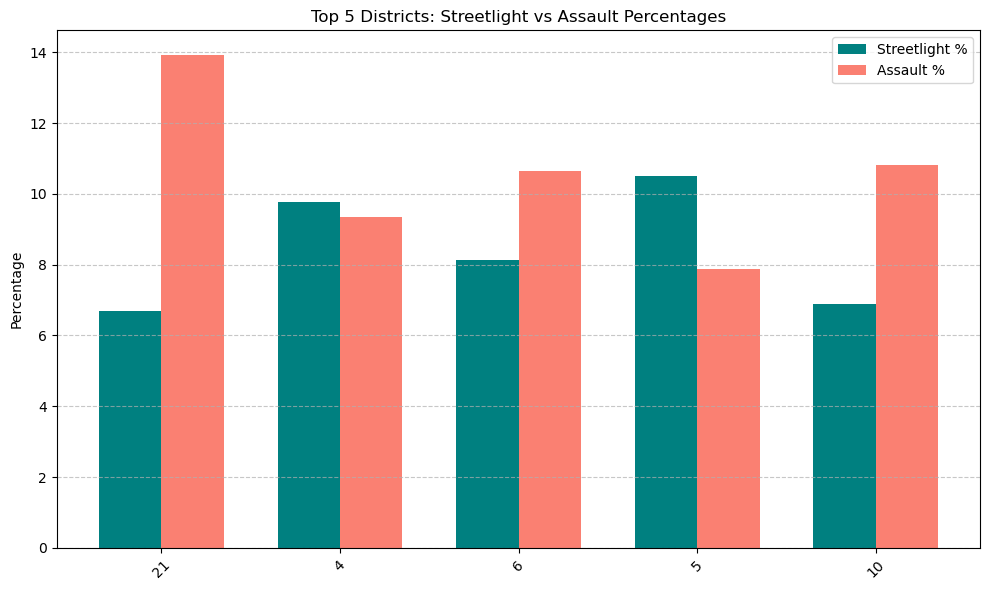

In [19]:

# Step 1: Group by district and calculate mean percentages
grouped = merged_df.groupby('council_district')[['streetlight_percentage', 'assaults_percentage']].mean()

# Step 2: Rank by combined score and select top 5
grouped['combined'] = grouped['streetlight_percentage'] + grouped['assaults_percentage']
top5 = grouped.sort_values('combined', ascending=False).head(5)

# Step 3: Prepare data for grouped bar chart
districts = top5.index.tolist()
streetlight_vals = top5['streetlight_percentage'].values
assault_vals = top5['assaults_percentage'].values
x = np.arange(len(districts))
width = 0.35

# Step 4: Plot grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, streetlight_vals, width, label='Streetlight %', color='teal')
plt.bar(x + width/2, assault_vals, width, label='Assault %', color='salmon')

# Step 5: Customize chart
plt.xticks(x, districts, rotation=45)
plt.ylabel('Percentage')
plt.title('Top 5 Districts: Streetlight vs Assault Percentages')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [22]:

# Step 1: Define thresholds for "high" values (top 25%)
high_streetlight_thresh = merged_df['streetlight_percentage'].quantile(0.75)
high_assault_thresh = merged_df['assaults_percentage'].quantile(0.75)

# Step 2: Flag high streetlight and high assault rows
merged_df['high_streetlight'] = merged_df['streetlight_percentage'] >= high_streetlight_thresh
merged_df['high_assault'] = merged_df['assaults_percentage'] >= high_assault_thresh

# Step 3: Match rows with both high streetlight and high assault
merged_df['high_both'] = merged_df['high_streetlight'] & merged_df['high_assault']
high_both_df = merged_df[merged_df['high_both']]

# Step 4: List districts with high both
high_districts = high_both_df['council_district'].unique()
print("Districts with both high streetlight and high assault percentages:")
print(high_districts)

# Step 5: Check association using Spearman correlation
spearman_corr, spearman_p = spearmanr(
    merged_df['streetlight_percentage'],
    merged_df['assaults_percentage']
)
print(f"\nSpearman Correlation: r={spearman_corr:.3f}, p={spearman_p:.3f}")



Districts with both high streetlight and high assault percentages:
[ 4  6 15]

Spearman Correlation: r=0.093, p=0.312


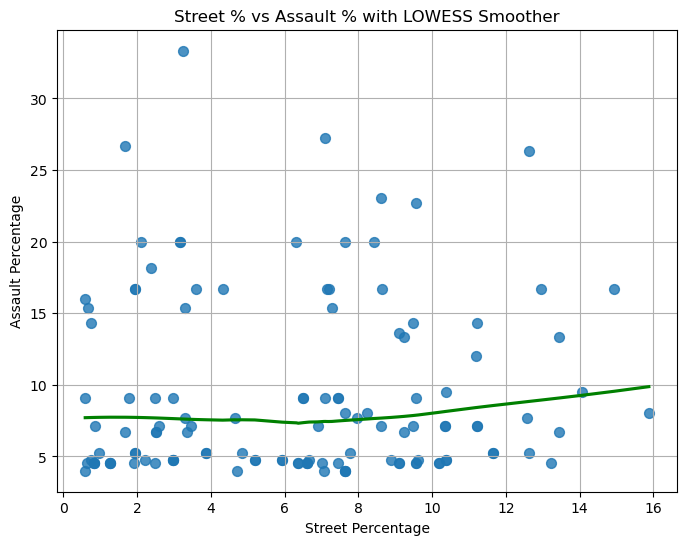

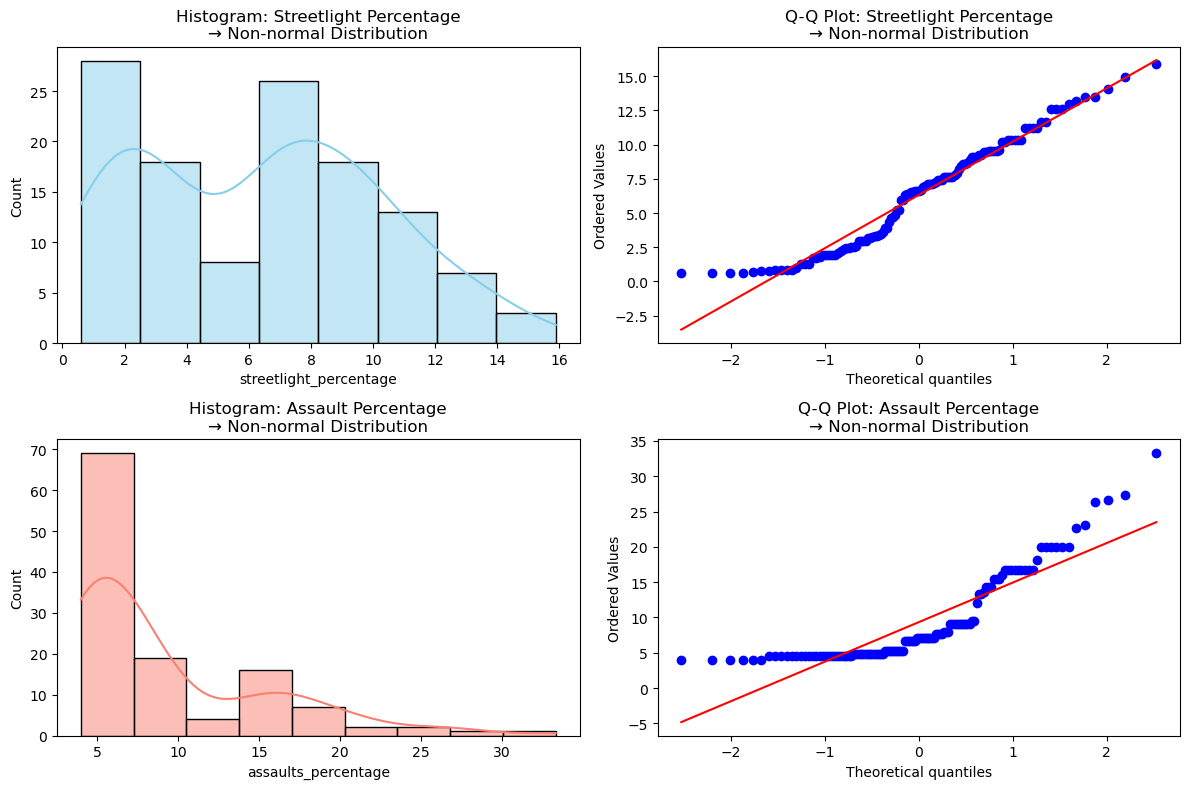

Shapiro-Wilk Test for Street %: ShapiroResult(statistic=0.9540542960166931, pvalue=0.0004078758938703686)
→ Non-normal
Shapiro-Wilk Test for Assault %: ShapiroResult(statistic=0.7875455617904663, pvalue=6.026023863930918e-12)
→ Non-normal
Pearson Correlation: 0.025
Spearman Correlation: 0.093
Kendall Correlation: 0.062


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau

# Step 1: Scatter Plot with LOWESS Smoother
plt.figure(figsize=(8, 6))
sns.regplot(x='streetlight_percentage', y='assaults_percentage', data=merged_df,
            lowess=True, scatter_kws={'s': 50}, line_kws={'color': 'green'})
plt.title('Street % vs Assault % with LOWESS Smoother')
plt.xlabel('Street Percentage')
plt.ylabel('Assault Percentage')
plt.grid(True)
plt.show()

# Step 2: Shapiro-Wilk Normality Tests
shapiro_street = shapiro(merged_df['streetlight_percentage'])
shapiro_assault = shapiro(merged_df['assaults_percentage'])

# Interpret results
street_normality = "Normal" if shapiro_street.pvalue > 0.05 else "Non-normal"
assault_normality = "Normal" if shapiro_assault.pvalue > 0.05 else "Non-normal"

# Step 3: Normality Diagrams with Comments
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogram for streetlight %
sns.histplot(merged_df['streetlight_percentage'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title(f'Histogram: Streetlight Percentage\n→ {street_normality} Distribution')

# Q-Q plot for streetlight %
stats.probplot(merged_df['streetlight_percentage'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title(f'Q-Q Plot: Streetlight Percentage\n→ {street_normality} Distribution')

# Histogram for assault %
sns.histplot(merged_df['assaults_percentage'], kde=True, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title(f'Histogram: Assault Percentage\n→ {assault_normality} Distribution')

# Q-Q plot for assault %
stats.probplot(merged_df['assaults_percentage'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title(f'Q-Q Plot: Assault Percentage\n→ {assault_normality} Distribution')

plt.tight_layout()
plt.show()

# Step 4: Print Shapiro-Wilk Results
print("Shapiro-Wilk Test for Street %:", shapiro_street)
print("→", street_normality)

print("Shapiro-Wilk Test for Assault %:", shapiro_assault)
print("→", assault_normality)

# Step 5: Correlation Tests
pearson_corr, _ = pearsonr(merged_df['streetlight_percentage'], merged_df['assaults_percentage'])
spearman_corr, _ = spearmanr(merged_df['streetlight_percentage'], merged_df['assaults_percentage'])
kendall_corr, _ = kendalltau(merged_df['streetlight_percentage'], merged_df['assaults_percentage'])

print(f"Pearson Correlation: {pearson_corr:.3f}")
print(f"Spearman Correlation: {spearman_corr:.3f}")
print(f"Kendall Correlation: {kendall_corr:.3f}")


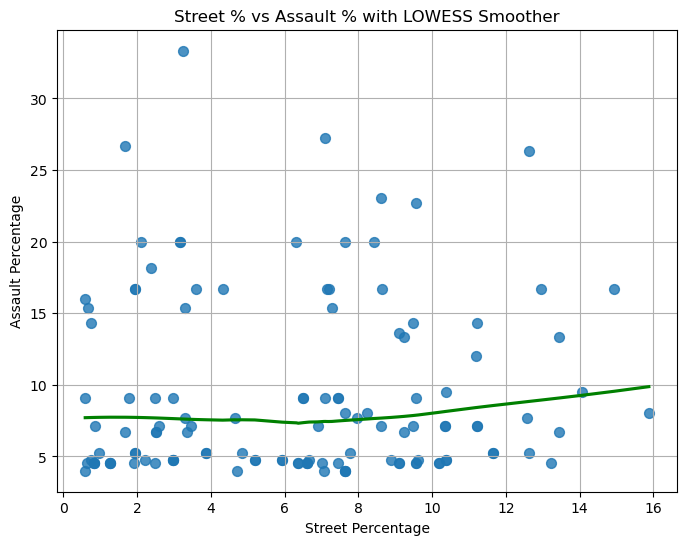

Shapiro-Wilk Test for Street %: ShapiroResult(statistic=0.9540542960166931, pvalue=0.0004078758938703686)
Shapiro-Wilk Test for Assault %: ShapiroResult(statistic=0.7875455617904663, pvalue=6.026023863930918e-12)
Pearson Correlation: 0.025
Spearman Correlation: 0.093
Kendall Correlation: 0.062


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau

# Step 1: Scatter Plot with LOWESS Smoother
plt.figure(figsize=(8, 6))
sns.regplot(x='streetlight_percentage', y='assaults_percentage', data=merged_df,
            lowess=True, scatter_kws={'s': 50}, line_kws={'color': 'green'})
plt.title('Street % vs Assault % with LOWESS Smoother')
plt.xlabel('Street Percentage')
plt.ylabel('Assault Percentage')
plt.grid(True)
plt.show()

# Step 2: Shapiro-Wilk Normality Tests
shapiro_street = shapiro(merged_df['streetlight_percentage'])
shapiro_assault = shapiro(merged_df['assaults_percentage'])

print("Shapiro-Wilk Test for Street %:", shapiro_street)
print("Shapiro-Wilk Test for Assault %:", shapiro_assault)

# Step 3: Correlation Tests
pearson_corr, _ = pearsonr(merged_df['streetlight_percentage'], merged_df['assaults_percentage'])
spearman_corr, _ = spearmanr(merged_df['streetlight_percentage'], merged_df['assaults_percentage'])
kendall_corr, _ = kendalltau(merged_df['streetlight_percentage'], merged_df['assaults_percentage'])

print(f"Pearson Correlation: {pearson_corr:.3f}")
print(f"Spearman Correlation: {spearman_corr:.3f}")
print(f"Kendall Correlation: {kendall_corr:.3f}")


In [28]:
merged_df['streetlight_percentage_lag'] = merged_df.groupby('council_district')['streetlight_percentage'].shift(1)
lagged_df_alt = merged_df.dropna(subset=['streetlight_percentage_lag'])


In [29]:
from scipy.stats import spearmanr

spearman_corr, spearman_p = spearmanr(
    lagged_df_alt['streetlight_percentage_lag'],
    lagged_df_alt['assaults_percentage']
)
print(f"Spearman Correlation: r={spearman_corr:.3f}, p={spearman_p:.3f}")


Spearman Correlation: r=0.141, p=0.162


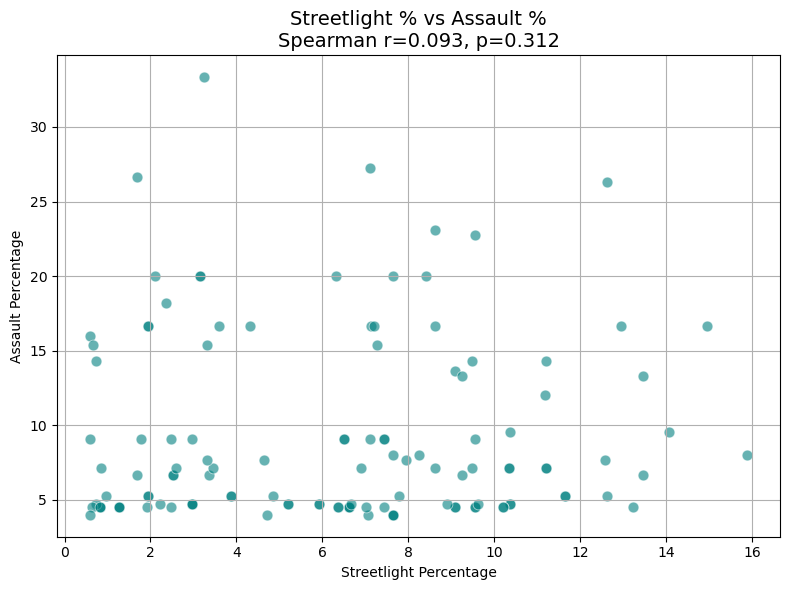

Spearman correlation is not statistically significant (r=0.093, p=0.312).


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Calculate Spearman correlation
spearman_corr, spearman_p = spearmanr(
    merged_df['streetlight_percentage'],
    merged_df['assaults_percentage']
)

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='streetlight_percentage',
    y='assaults_percentage',
    data=merged_df,
    s=60, alpha=0.6, color='teal'
)

# Add labels and title with Spearman results
plt.title(f'Streetlight % vs Assault %\nSpearman r={spearman_corr:.3f}, p={spearman_p:.3f}', fontsize=14)
plt.xlabel('Streetlight Percentage')
plt.ylabel('Assault Percentage')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print interpretation
if spearman_p < 0.05:
    print(f"Spearman correlation is statistically significant (r={spearman_corr:.3f}, p={spearman_p:.3f}).")
else:
    print(f"Spearman correlation is not statistically significant (r={spearman_corr:.3f}, p={spearman_p:.3f}).")


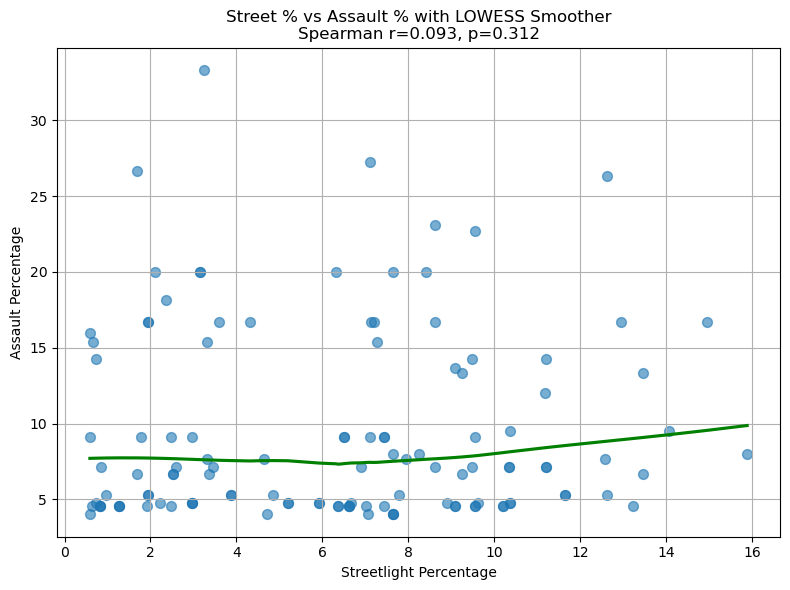

Spearman correlation is not statistically significant (r=0.093, p=0.312).


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Step 1: Calculate Spearman correlation
spearman_corr, spearman_p = spearmanr(
    merged_df['streetlight_percentage'],
    merged_df['assaults_percentage']
)

# Step 2: Scatter plot with LOWESS smoother
plt.figure(figsize=(8, 6))
sns.regplot(
    x='streetlight_percentage',
    y='assaults_percentage',
    data=merged_df,
    lowess=True,
    scatter_kws={'s': 50, 'alpha': 0.6},
    line_kws={'color': 'green'}
)
plt.title(f'Street % vs Assault % with LOWESS Smoother\nSpearman r={spearman_corr:.3f}, p={spearman_p:.3f}')
plt.xlabel('Streetlight Percentage')
plt.ylabel('Assault Percentage')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Print interpretation
if spearman_p < 0.05:
    print(f"Spearman correlation is statistically significant (r={spearman_corr:.3f}, p={spearman_p:.3f}).")
else:
    print(f"Spearman correlation is not statistically significant (r={spearman_corr:.3f}, p={spearman_p:.3f}).")


Spearman Correlation: r=0.080, p=0.426


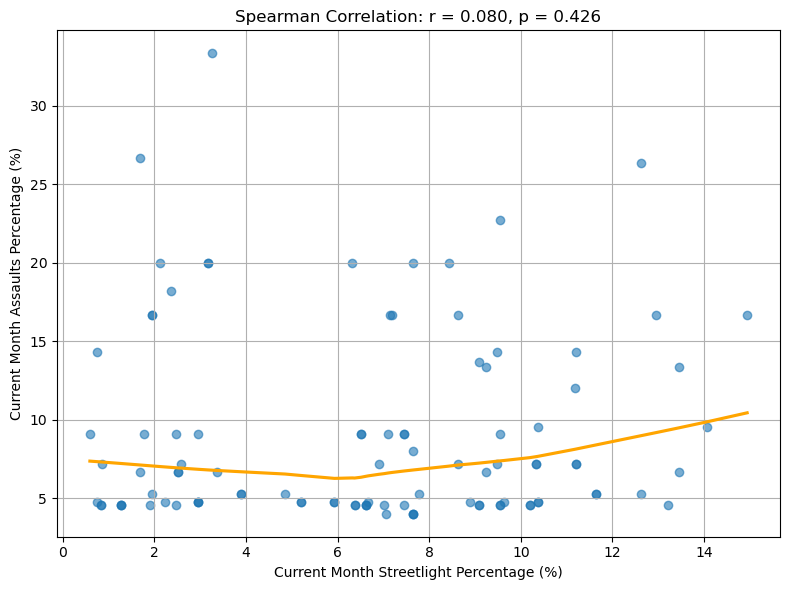

In [33]:
# Spearman correlation
from scipy.stats import spearmanr

spearman_corr, spearman_p = spearmanr(
    lagged_df_alt['streetlight_percentage'],
    lagged_df_alt['assaults_percentage']
)
print(f"Spearman Correlation: r={spearman_corr:.3f}, p={spearman_p:.3f}")

# Scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(
    x='streetlight_percentage',
    y='assaults_percentage',
    data=lagged_df_alt,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'orange'},
    lowess=True
)
plt.title(f"Spearman Correlation: r = {spearman_corr:.3f}, p = {spearman_p:.3f}")
plt.xlabel("Current Month Streetlight Percentage (%)")
plt.ylabel("Current Month Assaults Percentage (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
merged_df['streetlight_percentage_lag2'] = merged_df.groupby('council_district')['streetlight_percentage'].shift(2)


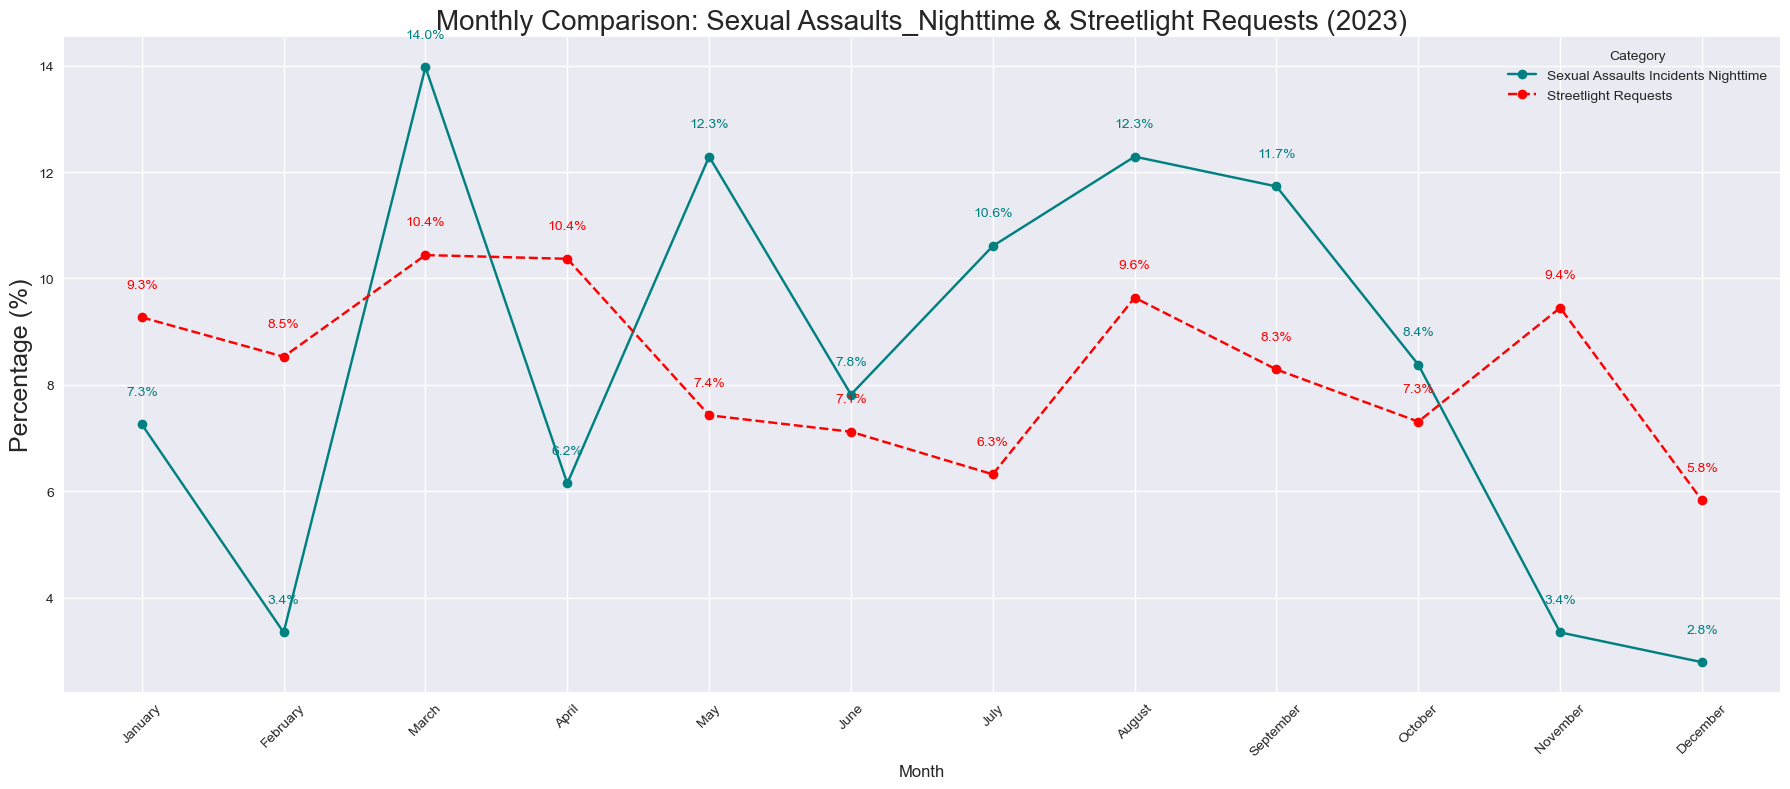

In [36]:
# Use a clean style
plt.style.use('seaborn-v0_8')

### INCIDENT DATA ###
assault_df_night['Offense Start Date'] = pd.to_datetime(assault_df_night['Offense Start Date'], errors='coerce')
assault_df_night['Year'] = assault_df_night['Offense Start Date'].dt.year
assault_df_night['month'] = assault_df_night['Offense Start Date'].dt.month

monthly_counts = assault_df_night[assault_df_night['Year'] == 2023]['month'].value_counts().sort_index()
total_incidents = monthly_counts.sum()
incident_percentages = (monthly_counts / total_incidents * 100).round(2)

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
incident_values = [incident_percentages.get(i, 0) for i in range(1, 13)]

### STREETLIGHT REQUEST DATA ###
streetlight_df = street_df[street_df['service_name'].str.contains('Street LightS', case=False, na=False)]
streetlight_df['requested_datetime'] = pd.to_datetime(streetlight_df['requested_datetime'], errors='coerce')
streetlight_df['month'] = streetlight_df['requested_datetime'].dt.month
streetlight_df['year'] = streetlight_df['requested_datetime'].dt.year

monthly_requests = streetlight_df[streetlight_df['year'] == 2023]['month'].value_counts().sort_index()
total_requests = monthly_requests.sum()
request_percentages = (monthly_requests / total_requests * 100).round(2)
request_values = [request_percentages.get(i, 0) for i in range(1, 13)]

### COMBINED PLOT ###
fig, ax = plt.subplots(figsize=(18, 8))

# Plot incidents
ax.plot(months, incident_values, marker='o', linestyle='-', color='teal', label='Sexual Assaults Incidents Nighttime')
for i, value in enumerate(incident_values):
    ax.text(i, value + 0.5, f"{value:.1f}%", ha='center', va='bottom', fontsize=10, color='teal')

# Plot streetlight requests
ax.plot(months, request_values, marker='o', linestyle='--', color='red', label='Streetlight Requests')
for i, value in enumerate(request_values):
    ax.text(i, value + 0.5, f"{value:.1f}%", ha='center', va='bottom', fontsize=10, color='red')

# Add labels and title
ax.set_title("Monthly Comparison: Sexual Assaults_Nighttime & Streetlight Requests (2023)", fontsize=20)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=18)
plt.xticks(rotation=45)
ax.legend(title='Category')
plt.tight_layout()
plt.show()


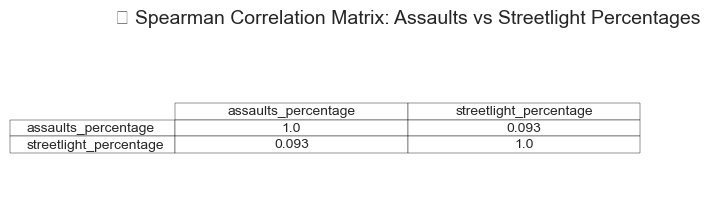

In [39]:
# Select relevant numeric columns
numeric_cols = merged_df[['assaults_percentage', 'streetlight_percentage']]

# Compute Spearman correlation matrix
corr_matrix = numeric_cols.corr(method='spearman')

# Display matrix as a table with a title
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=corr_matrix.round(3).values,
    rowLabels=corr_matrix.index,
    colLabels=corr_matrix.columns,
    cellLoc='center',
    loc='center'
)
plt.title('📊 Spearman Correlation Matrix: Assaults vs Streetlight Percentages', fontsize=14, pad=20)
plt.show()


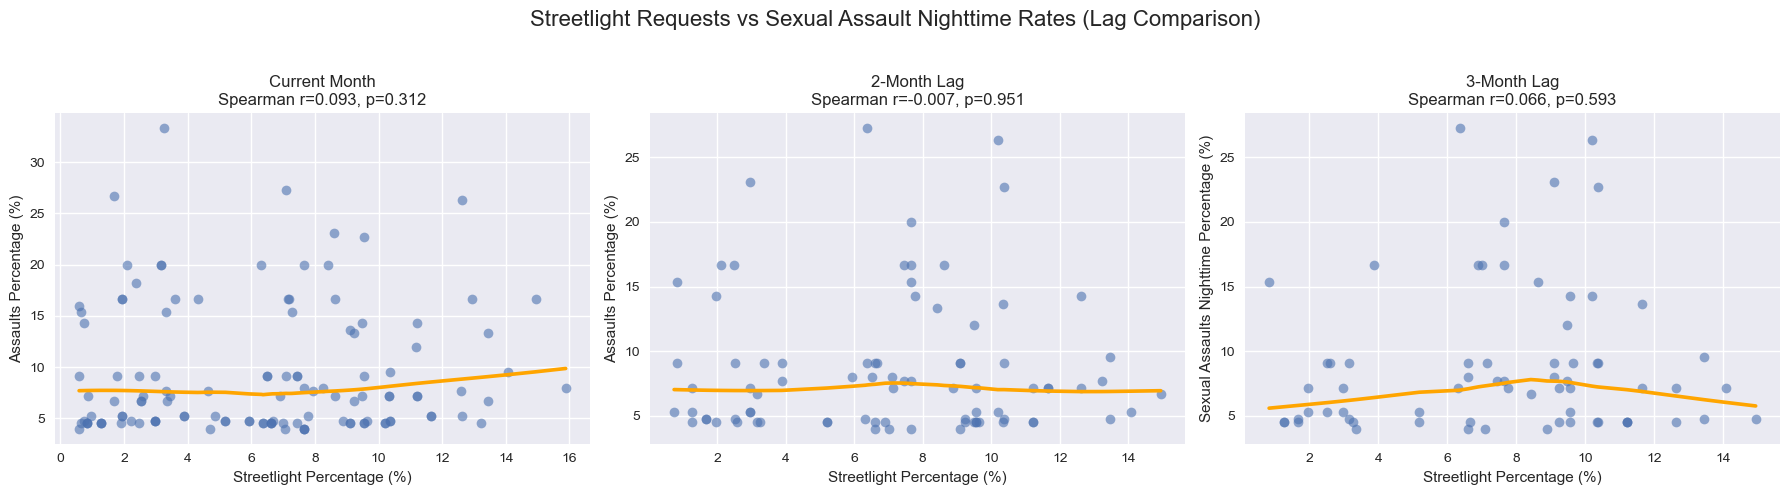

In [40]:
# Step 1: Sort and create lagged variables
merged_df = merged_df.sort_values(by=['council_district', 'month'])
merged_df['assaults_lag_2'] = merged_df.groupby('council_district')['assaults_percentage'].shift(2)
merged_df['assaults_lag_3'] = merged_df.groupby('council_district')['assaults_percentage'].shift(3)

# Step 2: Drop missing values
current_df = merged_df.dropna(subset=['assaults_percentage', 'streetlight_percentage'])
lag2_df = merged_df.dropna(subset=['assaults_lag_2', 'streetlight_percentage'])
lag3_df = merged_df.dropna(subset=['assaults_lag_3', 'streetlight_percentage'])

# Step 3: Calculate Spearman correlations
r_current, p_current = spearmanr(current_df['streetlight_percentage'], current_df['assaults_percentage'])
r_lag2, p_lag2 = spearmanr(lag2_df['streetlight_percentage'], lag2_df['assaults_lag_2'])
r_lag3, p_lag3 = spearmanr(lag3_df['streetlight_percentage'], lag3_df['assaults_lag_3'])

# Step 4: Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

# Current month
sns.regplot(
    ax=axes[0],
    x='streetlight_percentage',
    y='assaults_percentage',
    data=current_df,
    lowess=True,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'orange'}
)
axes[0].set_title(f'Current Month\nSpearman r={r_current:.3f}, p={p_current:.3f}')
axes[0].set_xlabel('Streetlight Percentage (%)')
axes[0].set_ylabel('Assaults Percentage (%)')

# 2-month lag
sns.regplot(
    ax=axes[1],
    x='streetlight_percentage',
    y='assaults_lag_2',
    data=lag2_df,
    lowess=True,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'orange'}
)
axes[1].set_title(f'2-Month Lag\nSpearman r={r_lag2:.3f}, p={p_lag2:.3f}')
axes[1].set_xlabel('Streetlight Percentage (%)')
axes[1].set_ylabel('Assaults Percentage (%)')

# 3-month lag
sns.regplot(
    ax=axes[2],
    x='streetlight_percentage',
    y='assaults_lag_3',
    data=lag3_df,
    lowess=True,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'orange'}
)
axes[2].set_title(f'3-Month Lag\nSpearman r={r_lag3:.3f}, p={p_lag3:.3f}')
axes[2].set_xlabel('Streetlight Percentage (%)')
axes[2].set_ylabel('Sexual Assaults Nighttime Percentage (%)')

# Final layout
plt.suptitle('Streetlight Requests vs Sexual Assault Nighttime Rates (Lag Comparison)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [41]:
# Step 1: Sort and create lagged variables
merged_df = merged_df.sort_values(by=['council_district', 'month'])
merged_df['assaults_lag_2'] = merged_df.groupby('council_district')['assaults_percentage'].shift(2)
merged_df['assaults_lag_3'] = merged_df.groupby('council_district')['assaults_percentage'].shift(3)

# Step 2: Drop missing values for each period
current_df = merged_df.dropna(subset=['assaults_percentage', 'streetlight_percentage'])
lag2_df = merged_df.dropna(subset=['assaults_lag_2', 'streetlight_percentage'])
lag3_df = merged_df.dropna(subset=['assaults_lag_3', 'streetlight_percentage'])

# Step 3: Compute Spearman correlations
r_current, p_current = spearmanr(current_df['streetlight_percentage'], current_df['assaults_percentage'])
r_2, p_2 = spearmanr(lag2_df['streetlight_percentage'], lag2_df['assaults_lag_2'])
r_3, p_3 = spearmanr(lag3_df['streetlight_percentage'], lag3_df['assaults_lag_3'])

# Step 4: Print results
print("📊 Spearman Correlation Results:")
print(f"Current Month:     r = {r_current:.3f}, p = {p_current:.3f}")
print(f"2-Month Lag:       r = {r_2:.3f}, p = {p_2:.3f}")
print(f"3-Month Lag:       r = {r_3:.3f}, p = {p_3:.3f}")


📊 Spearman Correlation Results:
Current Month:     r = 0.093, p = 0.312
2-Month Lag:       r = -0.007, p = 0.951
3-Month Lag:       r = 0.066, p = 0.593


In [42]:
print(merged_df.dtypes)

council_district                   int64
month                          period[M]
location_category                 object
reported_assaults_counts           int64
assaults_percentage              float64
request_count                      int64
district_percentage              float64
monthly_total                      int64
streetlight_percentage           float64
high_streetlight                    bool
high_assault                        bool
high_both                           bool
streetlight_percentage_lag       float64
streetlight_percentage_lag2      float64
assaults_lag_2                   float64
assaults_lag_3                   float64
dtype: object


In [43]:
def classify_location(text):
    text=text.upper()
    indoors= ["DRUG STORE","DOCTOR'S OFFICE","BAR/NIGHTCLUB","HOSPITAL","HOTEL","MOTEL","JAIL","PRISON","PENITENTIARY","CORRECTIONS FACILITY","NON-ATTACHED RESD GARAGE","SHED","BULD","OTHER RESIDENCE (APARTMENT/CONDO)","RESIDENCE","HOME","RESTAURANT","SCHOOL - ELEMENTARY/SECONDARY","SHELTER - MISSION/ HOMELESS","SPECIALTY STORE"]
    outdoors=["HIGHWAY","ROAD","ALLEY","STREET","SIDEWALK","PARKING","DROP LOT","GARAGE","SERVICE/GAS STATION","PARK","PLAYGROUND"]
    if not isinstance(text,str):
        return "Unknown"
    if any(word in text for word in indoors):
        return"Indoors"
    if any(word in text for word in outdoors):
        return "Outdoors"
    return "Unknown"
        
merged_df["Indoors_Outdoors"]=merged_df["location_category"].apply(classify_location)
merged_df

,council_district,month,location_category,reported_assaults_counts,assaults_percentage,request_count,district_percentage,monthly_total,streetlight_percentage,high_streetlight,high_assault,high_both,streetlight_percentage_lag,streetlight_percentage_lag2,assaults_lag_2,assaults_lag_3,Indoors_Outdoors
0,1,2023-01,RESIDENCE/HOME,3,23.08,13,14.29,151,8.61,False,True,False,NaN,NaN,NaN,NaN,Indoors
1,1,2023-03,RESIDENCE/HOME,1,4.00,12,13.19,170,7.06,False,False,False,8.61,NaN,NaN,NaN,Indoors
2,1,2023-04,RESIDENCE/HOME,1,9.09,5,5.49,169,2.96,False,False,False,7.06,8.61,23.08,NaN,Indoors
3,1,2023-05,RESIDENCE/HOME,1,4.55,11,12.09,121,9.09,False,False,False,2.96,7.06,4.00,23.08,Indoors
4,1,2023-10,RESIDENCE/HOME,1,6.67,4,4.40,119,3.36,False,False,False,9.09,2.96,9.09,4.00,Indoors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,25,2023-08,RESIDENCE/HOME,1,4.55,2,9.52,157,1.27,False,False,False,1.94,1.94,5.26,NaN,Indoors
117,25,2023-09,OTHER RESIDENCE (APARTMENT/CONDO),1,4.76,4,19.05,135,2.96,False,False,False,1.27,1.94,5.26,5.26,Indoors
118,26,2023-02,RESIDENCE/HOME,1,16.67,6,8.70,139,4.32,False,True,False,NaN,NaN,NaN,NaN,Indoors
119,26,2023-05,RESIDENCE/HOME,1,4.55,3,4.35,121,2.48,False,False,False,4.32,NaN,NaN,NaN,Indoors


In [44]:
merged_df['Indoors_Outdoors'].apply(type).value_counts()

Indoors_Outdoors
<class 'str'>    121
Name: count, dtype: int64

In [45]:
print(merged_df['Indoors_Outdoors'].unique())

['Indoors' 'Outdoors' 'Unknown']


In [48]:
# Robust linear Regression  Model
formula = "assaults_percentage ~ streetlight_percentage + Indoors_Outdoors"

# Model instantiation and fitting
rlm_model = smf.rlm(
    formula=formula,
    data=merged_df,
    M=sm.robust.norms.HuberT()
).fit()

# Print the summary
print(rlm_model.summary())


                     Robust linear Model Regression Results                    
Dep. Variable:     assaults_percentage   No. Observations:                  121
Model:                             RLM   Df Residuals:                      117
Method:                           IRLS   Df Model:                            3
Norm:                           HuberT                                         
Scale Est.:                        mad                                         
Cov Type:                           H1                                         
Date:                 Mon, 08 Dec 2025                                         
Time:                         10:48:10                                         
No. Iterations:                     14                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Interc

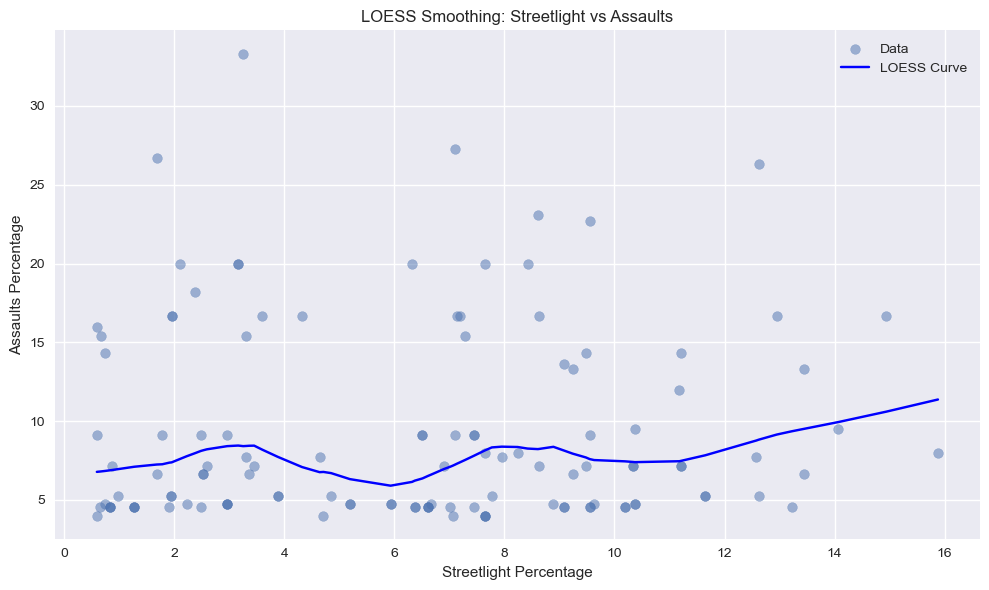

In [50]:
# Apply LOESS
loess_result = lowess(merged_df['assaults_percentage'], merged_df['streetlight_percentage'], frac=0.3)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['streetlight_percentage'], merged_df['assaults_percentage'], alpha=0.5, label='Data')
plt.plot(loess_result[:, 0], loess_result[:, 1], color='blue', label='LOESS Curve')
plt.xlabel('Streetlight Percentage')
plt.ylabel('Assaults Percentage')
plt.title('LOESS Smoothing: Streetlight vs Assaults')
plt.legend()
plt.tight_layout()
plt.show()
